In [1]:
#converting the 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import itertools
from scipy.stats import ttest_ind


#resouce (https://www.kaggle.com/datasets/sazidthe1/sustainable-development-report?select=sdg_index_2000-2022.csv)
sdgsdf = pd.read_csv("sdg_index_2000-2022.csv")

sustain = pd.read_csv("sustainable_development_report_2023.csv")


edudf = pd.read_csv('world-education-data.csv')
edu_countries = edudf["country"].tolist()
edu_code = edudf["country_code"].tolist()

df4 = pd.read_csv("4- mismanaged-plastic-waste-per-capita.csv")
df4_countries = df4["Entity"].tolist()
df4_code = df4["Code"].tolist()

gdp = pd.read_csv('filtered_dfgdp_2000_2020.csv')
gdp_countries = gdp['Country Name'].tolist()
gdp_code = gdp["Code"].tolist()

In [3]:
#Converting the data of the Column in one Row

# Load the CSV file
file_path = "filtered_dfgdp_2000_2020.csv"
df_wide = pd.read_csv(file_path)

# Inspect the first few rows
print("Original Data:")
print(df_wide.head())

id_column = df_wide.columns[0]  

# Convert the individual year into one row
df_long = df_wide.melt(id_vars=[id_column], var_name="year", value_name="Value")

# Convert 'year' to integer
df_long["year"] = pd.to_numeric(df_long["year"], errors="coerce")

# Display a sample of the transformed dataset
print("\nTransformed Data:")
print(df_long.head(10))  # Show only the first 10 rows


Original Data:
                  Country Name Code          2000          2001          2002  \
0                        Aruba  ABW  1.873453e+09  1.920112e+09  1.941341e+09   
1  Africa Eastern and Southern  AFE  2.839525e+11  2.588432e+11  2.648950e+11   
2                  Afghanistan  AFG           NaN           NaN  4.055180e+09   
3   Africa Western and Central  AFW  1.404080e+11  1.480120e+11  1.769334e+11   
4                       Angola  AGO  9.129635e+09  8.936064e+09  1.528559e+10   

           2003          2004          2005          2006          2007  ...  \
0  2.021229e+09  2.228492e+09  2.330726e+09  2.424581e+09  2.615084e+09  ...   
1  3.526921e+11  4.388756e+11  5.122599e+11  5.759762e+11  6.612422e+11  ...   
2  4.515559e+09  5.226779e+09  6.209138e+09  6.971286e+09  9.747880e+09  ...   
3  2.046419e+11  2.540903e+11  3.105543e+11  3.932967e+11  4.617776e+11  ...   
4  1.781271e+10  2.355205e+10  3.697092e+10  5.238101e+10  6.526645e+10  ...   

           2011  

In [5]:
gdp_long = df_long.dropna()

In [6]:
gdp_long

,Country Name,year,Value
266,Aruba,2000.0,1873452513.96648
267,Africa Eastern and Southern,2000.0,283952504751.697998
269,Africa Western and Central,2000.0,140407973778.931
270,Angola,2000.0,9129634978.33773
271,Albania,2000.0,3480355258.04122
...,...,...,...
5846,Samoa,2020.0,807100820.648132
5847,Kosovo,2020.0,7716925356.12536
5849,South Africa,2020.0,335442101366.416992
5850,Zambia,2020.0,18110631358.311401


In [7]:
df_long["year"] = df_long["year"].astype(str).str.replace(".0", "", regex=False).astype(str)


In [9]:
output_path = "gdp_2000_2020.csv"  
df_long.to_csv(output_path, index=False)  
print(f"Transformed dataset saved to: {output_path}")

Transformed dataset saved to: gdp_2000_2020.csv


In [11]:
print(df_long.columns)
print(sdgsdf.columns)


Index(['Country Name', 'year', 'Value'], dtype='object')
Index(['country_code', 'country', 'year', 'sdg_index_score', 'goal_1_score',
       'goal_2_score', 'goal_3_score', 'goal_4_score', 'goal_5_score',
       'goal_6_score', 'goal_7_score', 'goal_8_score', 'goal_9_score',
       'goal_10_score', 'goal_11_score', 'goal_12_score', 'goal_13_score',
       'goal_14_score', 'goal_15_score', 'goal_16_score', 'goal_17_score'],
      dtype='object')


In [12]:
merged_df = df_long.merge(sdgsdf[['goal_4_score']], left_index=True, right_index=True, how='left')


In [14]:

merged_df['Value'] = pd.to_numeric(merged_df['Value'], errors='coerce')
merged_df['goal_4_score'] = pd.to_numeric(merged_df['goal_4_score'], errors='coerce')

merged_df = merged_df.dropna(subset=['Value', 'goal_4_score'])

# Calculate Pearson correlation coefficient between 'Value' and 'goal_4_score'
corr, _ = pearsonr(merged_df['Value'], merged_df['goal_4_score'])

print(f"Pearson correlation coefficient (r): {corr}")

Pearson correlation coefficient (r): -0.010043386865923059


In [15]:


correlation_results = {}

# Loop through each country
for county in merged_df['Country Name'].unique():
    county_data = merged_df[merged_df['Country Name'] == county]
    
    if len(county_data) > 1:  
        corr, p_value = pearsonr(county_data['Value'], county_data['goal_4_score'])
        correlation_results[county] = (corr, p_value)
    else:
        correlation_results[county] = None  

# Print the correlation coefficient and p-value
for county, result in correlation_results.items():
    if result is not None:
        corr, p_value = result
        print(f"County: {county}, Pearson correlation coefficient (r): {corr}, p-value: {p_value}")
    else:
        print(f"County: {county} has insufficient data for correlation.")


County: Aruba, Pearson correlation coefficient (r): -0.33437092908074784, p-value: 0.22318100449597955
County: Africa Eastern and Southern, Pearson correlation coefficient (r): -0.16043212448924793, p-value: 0.5678864200084229
County: Africa Western and Central, Pearson correlation coefficient (r): -0.11785642030490424, p-value: 0.675713417327041
County: Angola, Pearson correlation coefficient (r): -0.01771469114358821, p-value: 0.950036614228314
County: Albania, Pearson correlation coefficient (r): -0.22043177837364064, p-value: 0.429849922658933
County: Andorra, Pearson correlation coefficient (r): -0.5235511787834636, p-value: 0.045181958817883575
County: Arab World, Pearson correlation coefficient (r): 0.15677359630822357, p-value: 0.5768610873132222
County: United Arab Emirates, Pearson correlation coefficient (r): 0.040571113709421985, p-value: 0.8858501364247515
County: Argentina, Pearson correlation coefficient (r): 0.3532587919607328, p-value: 0.1964952424784996
County: Armeni

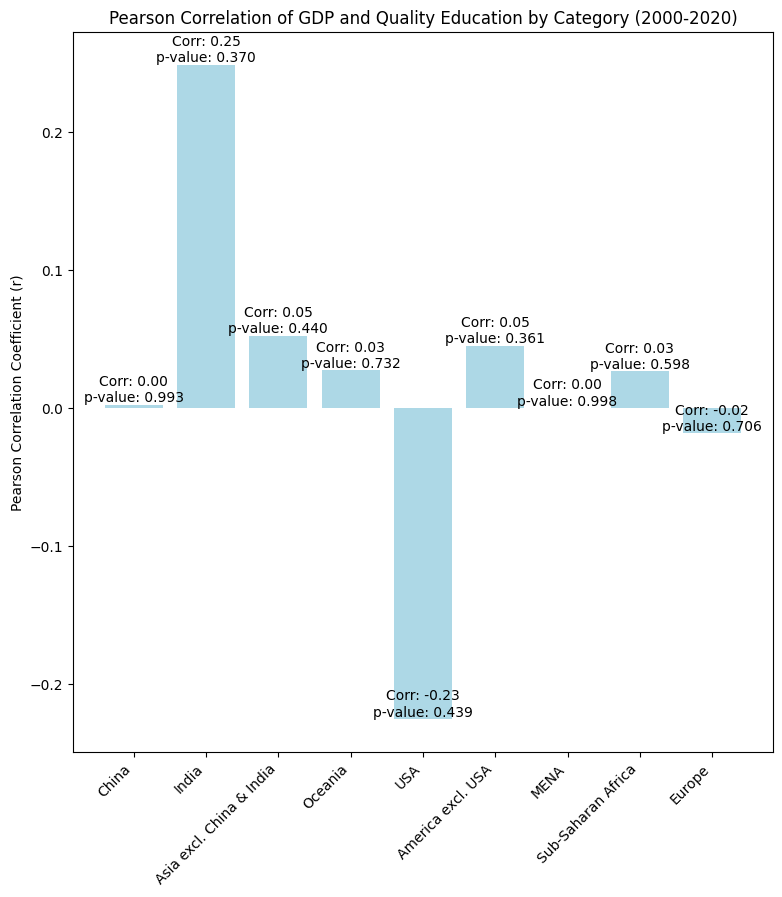

In [17]:


# Ensure 'Value' and 'goal_4_score' columns are numeric
merged_df['Value'] = pd.to_numeric(merged_df['Value'], errors='coerce')
merged_df['goal_4_score'] = pd.to_numeric(merged_df['goal_4_score'], errors='coerce')

# Drop rows with NaN values in 'Value' or 'goal_4_score' columns
merged_df = merged_df.dropna(subset=['Value', 'goal_4_score'])

# Continent lists (same as your previous lists)
china = ['China']
india = ['India']
asia_excl_china_india = ['Bangladesh', 'Brunei', 'Cambodia', 'Hong Kong', 'Indonesia', 'Japan', 'Kazakhstan', 
                          'Korea, Rep.', 'Malaysia', 'Maldives', 'Myanmar', 'North Korea', 'Pakistan', 'Philippines', 
                          'Singapore', 'Sri Lanka', 'Thailand', 'Vietnam']
oceania = ['Australia', 'Fiji', 'Kiribati', 'Marshall Islands', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 
           'Solomon Islands', 'Tonga', 'Timor-Leste']
usa = ['United States']
america_excl_usa = ['Antigua and Barbuda', 'Argentina', 'Barbados', 'Belize', 'Brazil', 'Canada', 'Chile', 'Colombia', 
                    'Costa Rica', 'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada', 'Guatemala', 
                    'Guyana', 'Honduras', 'Jamaica', 'Mexico', 'Panama', 'Peru', 'Puerto Rico', 'Suriname', 
                    'Trinidad and Tobago', 'Uruguay', 'Venezuela', 'Bahamas', 'Haiti', 'Nicaragua', 'Saint Kitts and Nevis', 
                    'Saint Lucia', 'Saint Vincent and the Grenadines', 'Sao Tome and Principe']
mena = ['Algeria', 'Bahrain', 'Cyprus', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 
        'Morocco', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Sudan', 'Syria', 'Tunisia', 'Turkey', 'United Arab Emirates', 'Yemen']
sub_saharan_africa = ['Benin', 'Burkina Faso', 'Cameroon', 'Gabon', 'Ghana', 'Kenya', 'Lesotho', 'Liberia', 'Madagascar', 
                      'Mauritania', 'Nigeria', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 'South Africa', 'Togo', 
                      'Zimbabwe', 'Angola', 'Comoros', 'Congo', 'Ivory Coast', 'Democratic Republic of the Congo', 'Djibouti', 
                      'Equatorial Guinea', 'Eritrea', 'Gambia', 'Guinea', 'Guinea-Bissau', 'Mozambique', 'Namibia', 'Tanzania']
europe = ['Albania', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Denmark', 'Estonia', 'Finland', 'France', 
          'Georgia', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Monaco', 'Netherlands', 
          'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Ukraine', 
          'United Kingdom', 'Montenegro']

# Function to calculate correlation and p-value for each category
def get_correlation_by_category(merged_df, category_countries):
    category_data = merged_df[merged_df['Country Name'].isin(category_countries)]
    if len(category_data) > 1:  # Ensure there is more than one data point
        corr, p_value = pearsonr(category_data['Value'], category_data['goal_4_score'])
        return corr, p_value
    else:
        return None, None

# Dictionary to store correlation results by category
category_corr = {}

# Calculate correlation and p-value for each category
category_corr['China'] = get_correlation_by_category(merged_df, china)
category_corr['India'] = get_correlation_by_category(merged_df, india)
category_corr['Asia excl. China & India'] = get_correlation_by_category(merged_df, asia_excl_china_india)
category_corr['Oceania'] = get_correlation_by_category(merged_df, oceania)
category_corr['USA'] = get_correlation_by_category(merged_df, usa)
category_corr['America excl. USA'] = get_correlation_by_category(merged_df, america_excl_usa)
category_corr['MENA'] = get_correlation_by_category(merged_df, mena)
category_corr['Sub-Saharan Africa'] = get_correlation_by_category(merged_df, sub_saharan_africa)
category_corr['Europe'] = get_correlation_by_category(merged_df, europe)

# Remove None values (categories without sufficient data)
category_corr = {category: result for category, result in category_corr.items() if result[0] is not None}

# Prepare data for plotting
categories = list(category_corr.keys())
correlations = [result[0] for result in category_corr.values()]
p_values = [result[1] for result in category_corr.values()]

# Plot the correlation for each category
plt.figure(figsize=(10, 8))
bars = plt.bar(categories, correlations, color='lightblue')

# Annotate each bar with the correlation value and p-value
for i, bar in enumerate(bars):
    corr_value = correlations[i]
    p_value = p_values[i]
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'Corr: {corr_value:.2f}\np-value: {p_value:.3f}', 
             ha='center', va='bottom', fontsize=10, color='black')

# Add labels and title
plt.ylabel('Pearson Correlation Coefficient (r)')
plt.title('Pearson Correlation of GDP and Quality Education by Category (2000-2020)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.05)

# Show the plot
plt.show()



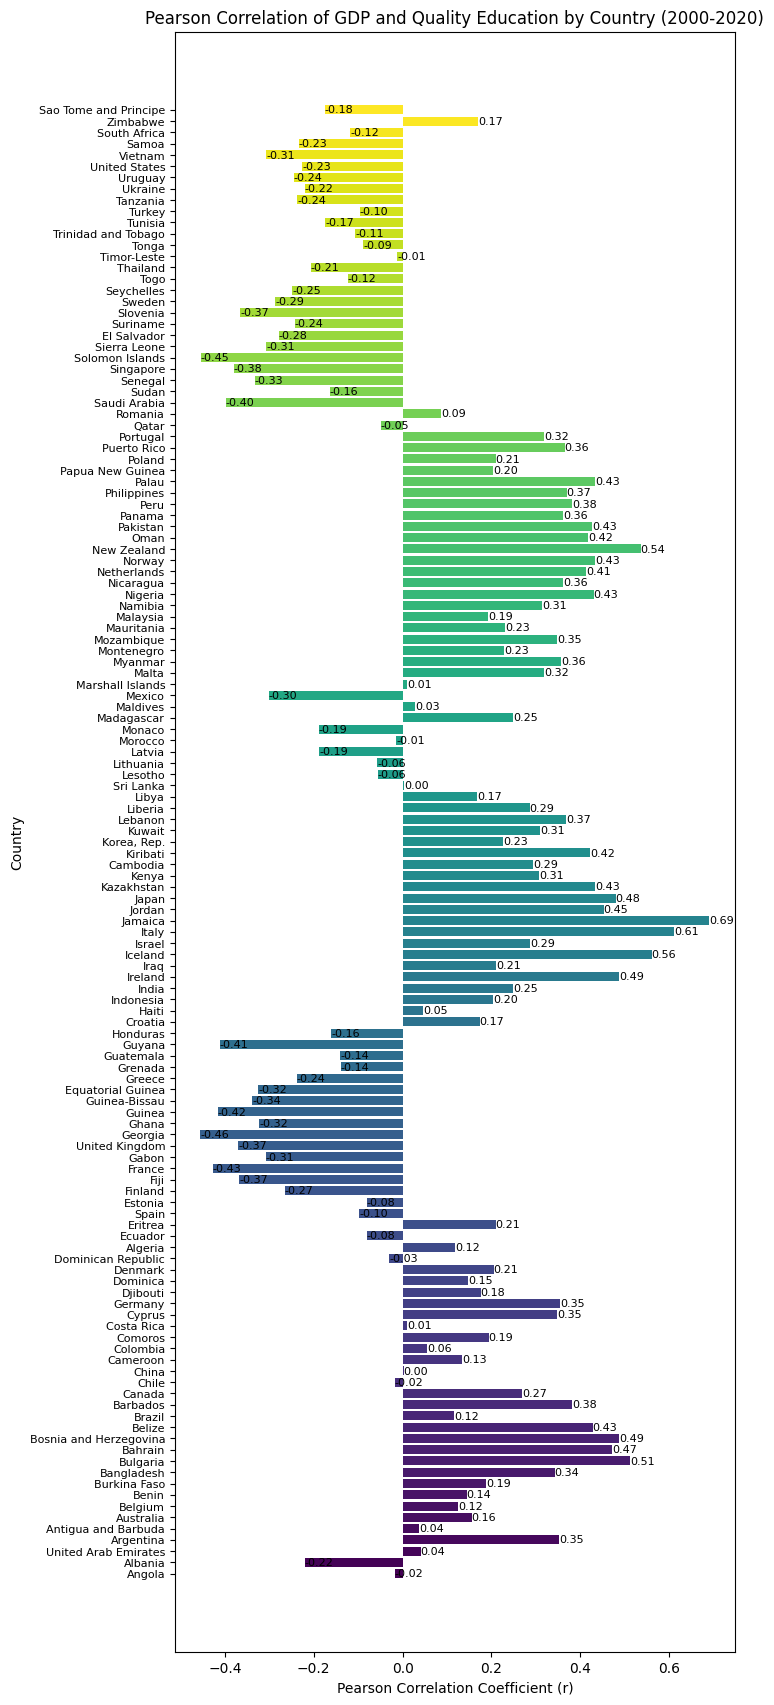

In [18]:


# Ensure 'Value' and 'goal_4_score' columns are numeric
merged_df['Value'] = pd.to_numeric(merged_df['Value'], errors='coerce')
merged_df['goal_4_score'] = pd.to_numeric(merged_df['goal_4_score'], errors='coerce')

# Drop rows with NaN values in 'Value' or 'goal_4_score' columns
merged_df = merged_df.dropna(subset=['Value', 'goal_4_score'])

# Define the countries you're interested in
selected_countries = [
    'China', 'India', 'Bangladesh', 'Brunei', 'Cambodia', 'Hong Kong', 'Indonesia', 'Japan', 
    'Kazakhstan', 'Korea, Rep.', 'Malaysia', 'Maldives', 'Myanmar', 'North Korea', 'Pakistan', 
    'Philippines', 'Singapore', 'Sri Lanka', 'Thailand', 'Vietnam', 'Australia', 'Fiji', 'Kiribati', 
    'Marshall Islands', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 
    'Tonga', 'Timor-Leste', 'United States', 'Antigua and Barbuda', 'Argentina', 'Barbados', 'Belize', 
    'Brazil', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Dominica', 'Dominican Republic', 'Ecuador', 
    'El Salvador', 'Grenada', 'Guatemala', 'Guyana', 'Honduras', 'Jamaica', 'Mexico', 'Panama', 'Peru', 
    'Puerto Rico', 'Suriname', 'Trinidad and Tobago', 'Uruguay', 'Venezuela', 'Bahamas', 'Haiti', 'Nicaragua', 
    'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Sao Tome and Principe', 
    'Algeria', 'Bahrain', 'Cyprus', 'Egypt', 'Iran', 'Iraq', 'Israel', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 
    'Morocco', 'Oman', 'Palestine', 'Qatar', 'Saudi Arabia', 'Sudan', 'Syria', 'Tunisia', 'Turkey', 
    'United Arab Emirates', 'Yemen', 'Benin', 'Burkina Faso', 'Cameroon', 'Gabon', 'Ghana', 'Kenya', 'Lesotho', 
    'Liberia', 'Madagascar', 'Mauritania', 'Nigeria', 'Senegal', 'Seychelles', 'Sierra Leone', 'Somalia', 
    'South Africa', 'Togo', 'Zimbabwe', 'Angola', 'Comoros', 'Congo', 'Ivory Coast', 'Democratic Republic of the Congo', 
    'Djibouti', 'Equatorial Guinea', 'Eritrea', 'Gambia', 'Guinea', 'Guinea-Bissau', 'Mozambique', 'Namibia', 'Tanzania', 
    'Albania', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Denmark', 'Estonia', 'Finland', 'France', 
    'Georgia', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Monaco', 'Netherlands', 
    'Norway', 'Poland', 'Portugal', 'Romania', 'Russia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Ukraine', 
    'United Kingdom', 'Montenegro'
]

# Filter the merged_df to only include selected countries
filtered_df = merged_df[merged_df['Country Name'].isin(selected_countries)]

# Create a dictionary to store correlations for each country
country_corr = {}

# Loop through each country and calculate the Pearson correlation
for country in filtered_df['Country Name'].unique():
    country_data = filtered_df[filtered_df['Country Name'] == country]
    
    # Calculate Pearson correlation for each country
    if len(country_data) > 1:  # Ensure there is more than one data point
        corr, _ = pearsonr(country_data['Value'], country_data['goal_4_score'])
        country_corr[country] = corr
    else:
        country_corr[country] = None  # In case of insufficient data

# Remove countries with None values (insufficient data)
filtered_country_corr = {country: corr for country, corr in country_corr.items() if corr is not None}

# Prepare data for plotting
countries = list(filtered_country_corr.keys())
correlations = list(filtered_country_corr.values())

# Assign a color to each country (using a colormap)
colors = plt.cm.viridis(np.linspace(0, 1, len(countries)))  # You can choose any colormap here

plt.figure(figsize=(8, 18))  
bars = plt.barh(countries, correlations, color=colors)

# Annotate each bar with the correlation value
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width():.2f}', 
             va='center', ha='left', fontsize=8, color='black')


plt.xlabel('Pearson Correlation Coefficient (r)')
plt.ylabel('Country')
plt.title('Pearson Correlation of GDP and Quality Education by Country (2000-2020)')

plt.yticks(fontsize=8)  

plt.subplots_adjust(left=0.15, right=0.85, top=0.95, bottom=0.05)  # Adjust the margins



--- Correlations for China ---
China: 0.00


--- Correlations for India ---
India: 0.25


--- Correlations for Asia excl. China & India ---
Bangladesh: 0.34
Brunei: Insufficient data
Cambodia: 0.29
Hong Kong: Insufficient data
Indonesia: 0.20
Japan: 0.48
Kazakhstan: 0.43
Korea, Rep.: 0.23
Malaysia: 0.19
Maldives: 0.03
Myanmar: 0.36
North Korea: Insufficient data
Pakistan: 0.43
Philippines: 0.37
Singapore: -0.38
Sri Lanka: 0.00
Thailand: -0.21
Vietnam: -0.31


--- Correlations for Oceania ---
Australia: 0.16
Fiji: -0.37
Kiribati: 0.42
Marshall Islands: 0.01
New Zealand: 0.54
Palau: 0.43
Papua New Guinea: 0.20
Samoa: -0.23
Solomon Islands: -0.45
Tonga: -0.09
Timor-Leste: -0.01


--- Correlations for USA ---
United States: -0.23


--- Correlations for America excl. USA ---
Antigua and Barbuda: 0.04
Argentina: 0.35
Barbados: 0.38
Belize: 0.43
Brazil: 0.12
Canada: 0.27
Chile: -0.02
Colombia: 0.06
Costa Rica: 0.01
Dominica: 0.15
Dominican Republic: -0.03
Ecuador: -0.08
El Salvador: -0.28
Gre

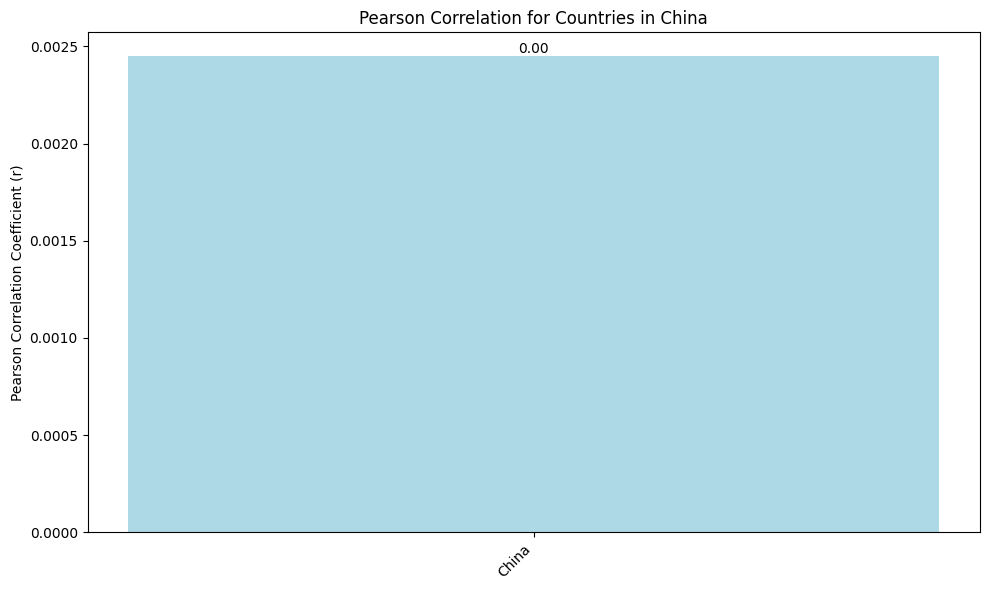

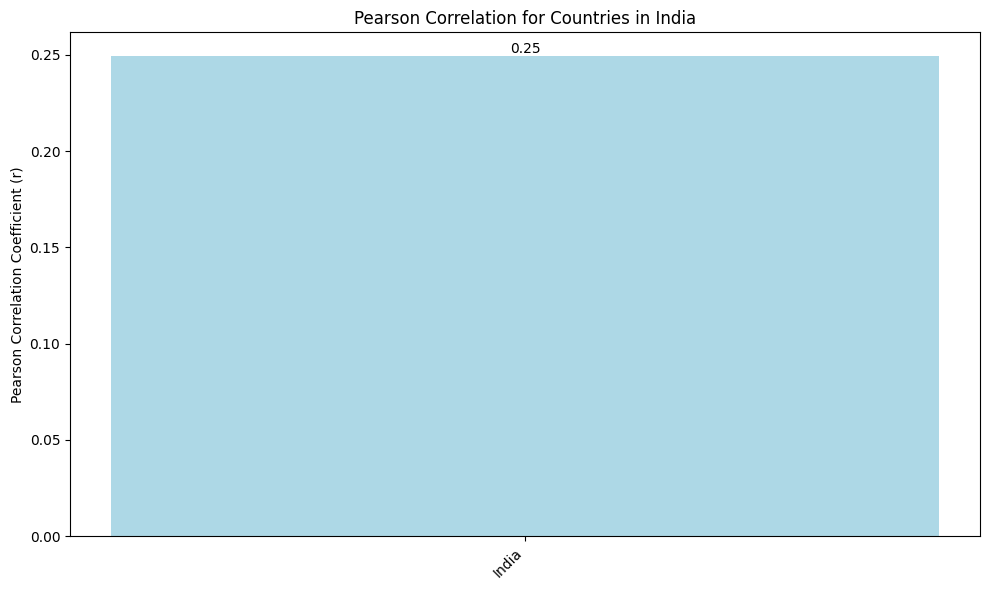

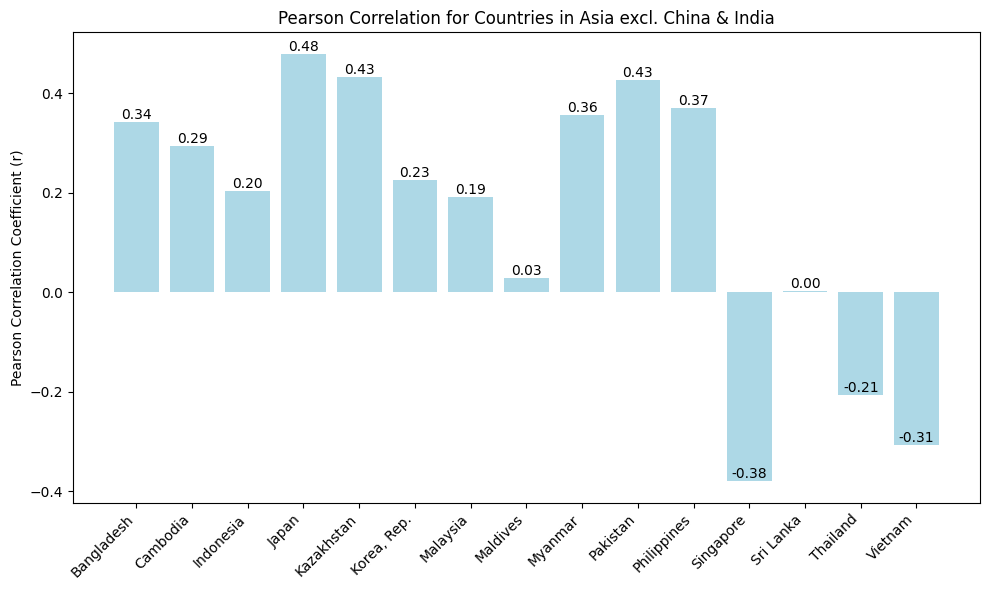

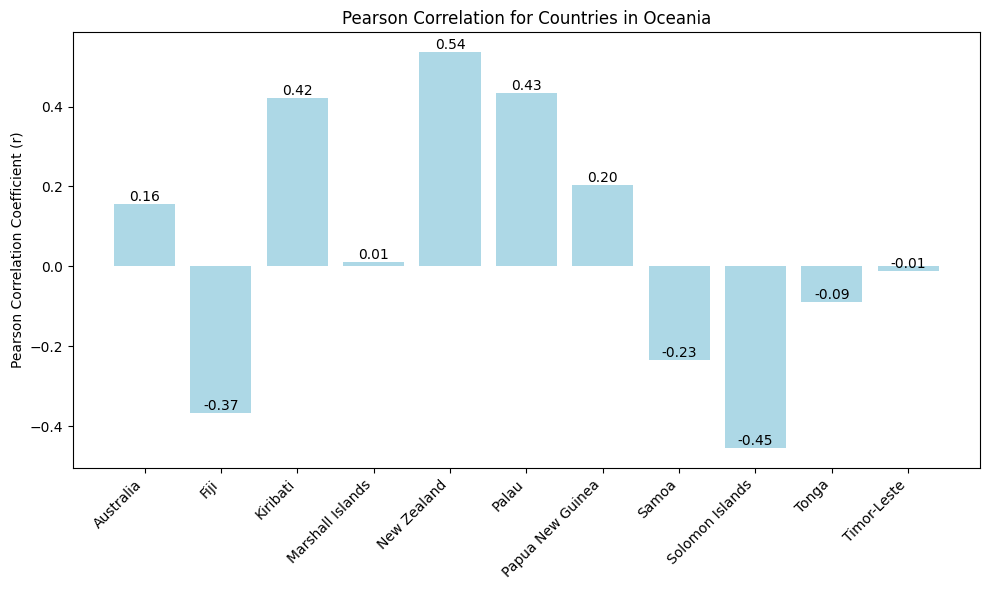

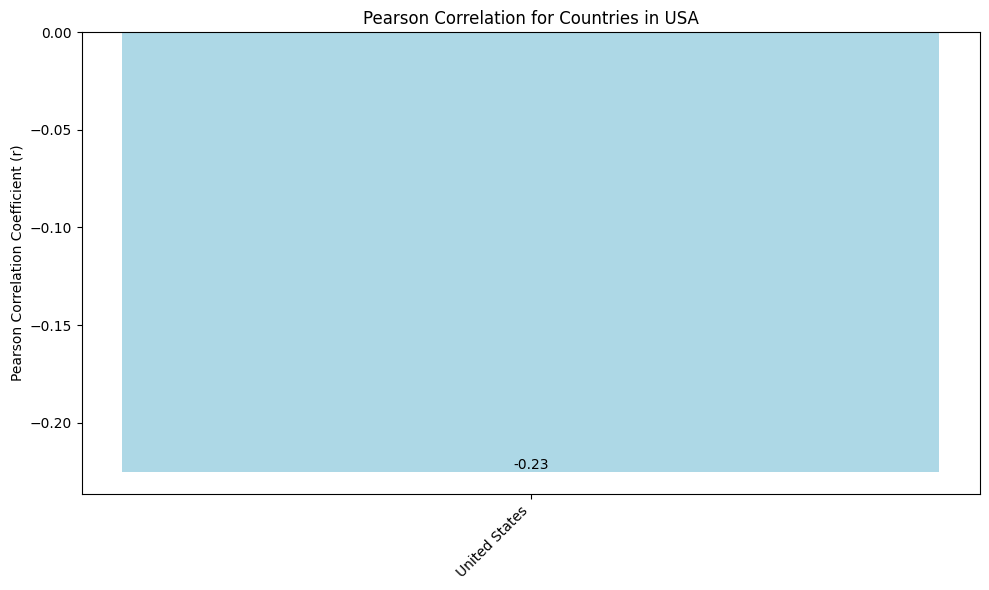

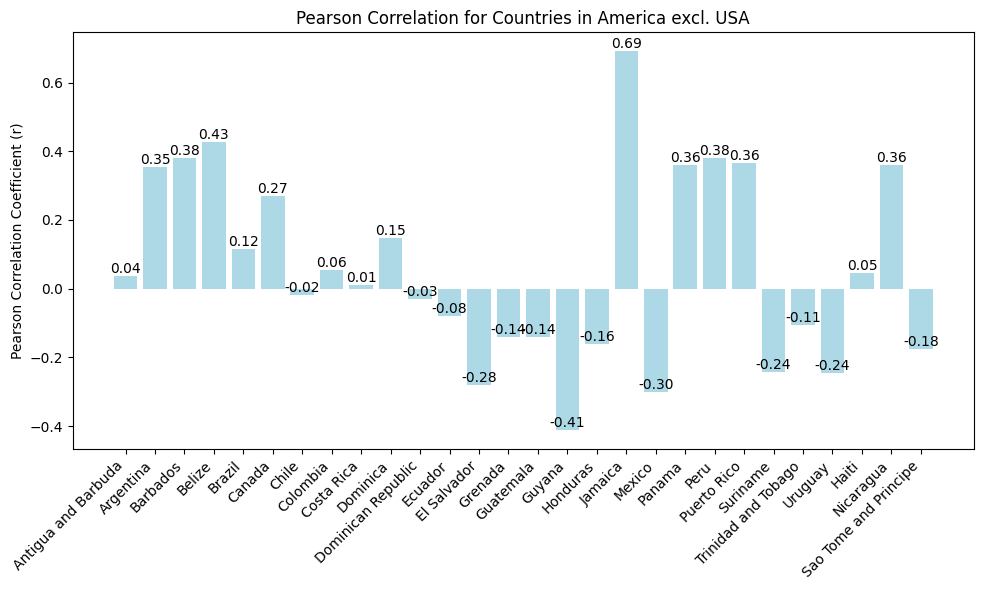

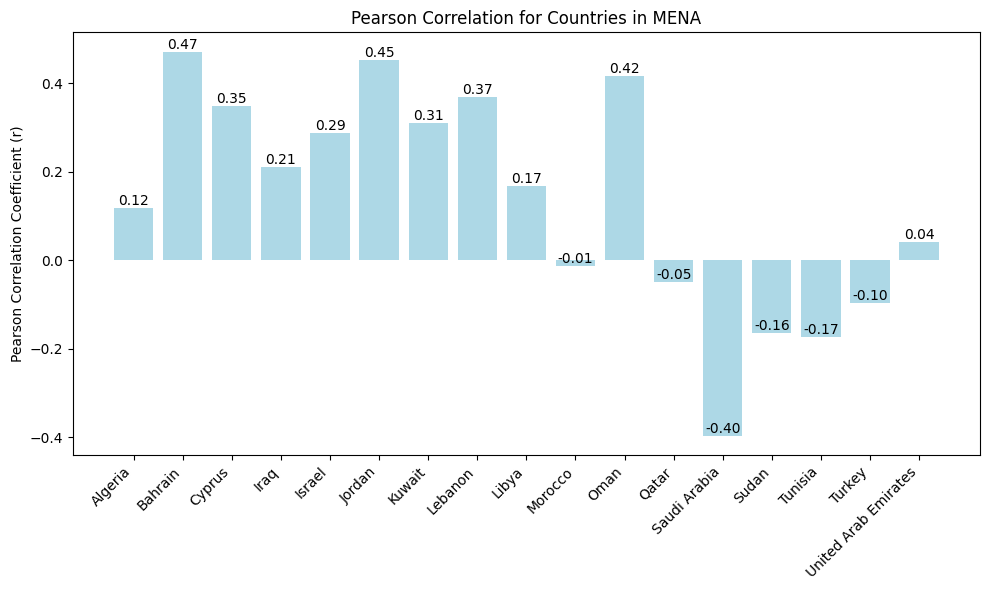

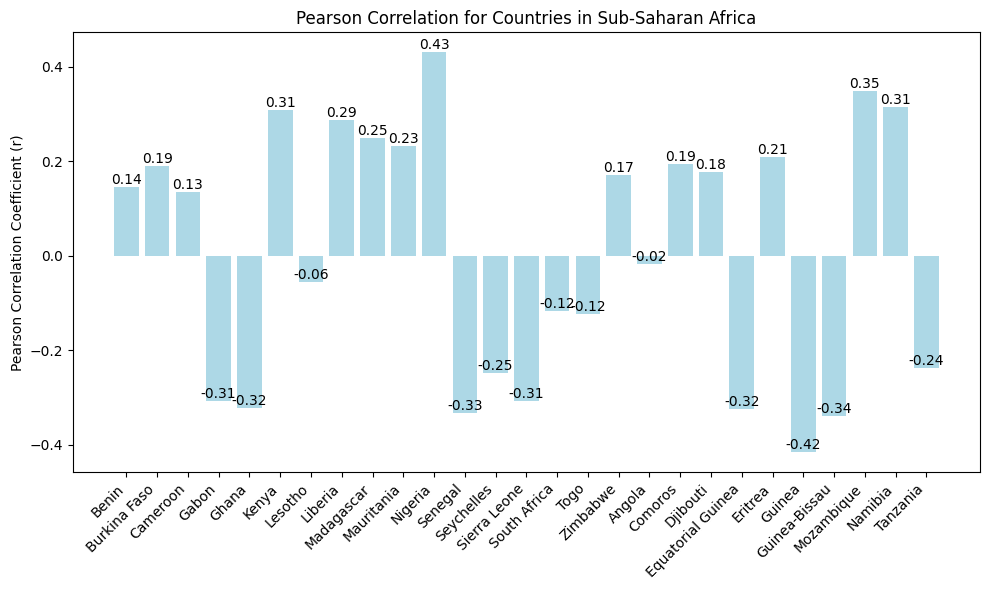

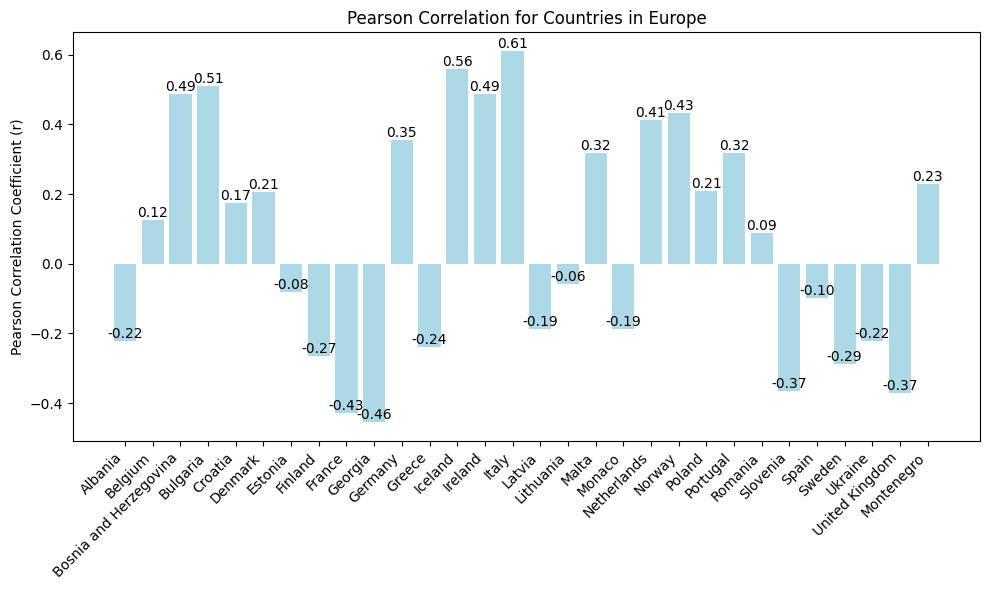

In [19]:

def get_country_correlations(merged_df, category_countries):
    category_data = merged_df[merged_df['Country Name'].isin(category_countries)]
    country_corr = {}
    
    for country in category_countries:
        country_data = category_data[category_data['Country Name'] == country]
        if len(country_data) > 1:  # Ensure there is more than one data point
            corr, _ = pearsonr(country_data['Value'], country_data['goal_4_score'])
            country_corr[country] = corr
        else:
            country_corr[country] = None
    
    return country_corr

# Dictionary to store correlation results by country within each category
category_country_corr = {}

# Get correlation for each category (Asia, MENA, etc.) and their countries
category_country_corr['China'] = get_country_correlations(merged_df, china)
category_country_corr['India'] = get_country_correlations(merged_df, india)
category_country_corr['Asia excl. China & India'] = get_country_correlations(merged_df, asia_excl_china_india)
category_country_corr['Oceania'] = get_country_correlations(merged_df, oceania)
category_country_corr['USA'] = get_country_correlations(merged_df, usa)
category_country_corr['America excl. USA'] = get_country_correlations(merged_df, america_excl_usa)
category_country_corr['MENA'] = get_country_correlations(merged_df, mena)
category_country_corr['Sub-Saharan Africa'] = get_country_correlations(merged_df, sub_saharan_africa)
category_country_corr['Europe'] = get_country_correlations(merged_df, europe)

# Now let's display the correlations for each country in each category
for category, country_corr in category_country_corr.items():
    print(f"--- Correlations for {category} ---")
    for country, corr in country_corr.items():
        if corr is not None:
            print(f"{country}: {corr:.2f}")
        else:
            print(f"{country}: Insufficient data")
    print("\n")

# Plot the correlation for each category
# Prepare data for plotting (based on countries' correlations in the category)
for category, country_corr in category_country_corr.items():
    countries = [country for country, corr in country_corr.items() if corr is not None]
    correlations = [corr for corr in country_corr.values() if corr is not None]
    
    # Only plot if there are countries with correlation values
    if countries:
        plt.figure(figsize=(10, 6))
        bars = plt.bar(countries, correlations, color='lightblue')
        
        # Annotate each bar with the correlation value
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
                     ha='center', va='bottom', fontsize=10, color='black')
        
        # Add labels and title
        plt.ylabel('Pearson Correlation Coefficient (r)')
        plt.title(f'Pearson Correlation for Countries in {category}')
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Adjust layout to make sure everything fits within the figure
        plt.tight_layout()
        
        # Show the plot
        plt.show()


In [20]:
merged_df.dropna()

,Country Name,year,Value,goal_4_score
266,Aruba,2000,1.873453e+09,59.5
267,Africa Eastern and Southern,2000,2.839525e+11,59.5
269,Africa Western and Central,2000,1.404080e+11,65.5
270,Angola,2000,9.129635e+09,64.9
271,Albania,2000,3.480355e+09,68.5
...,...,...,...,...
4134,Luxembourg,2014,6.871329e+10,59.6
4135,Latvia,2014,3.134515e+10,57.9
4136,"Macao SAR, China",2014,5.490303e+10,60.6
4138,Morocco,2014,1.100812e+11,62.5


--- Correlations for China ---
China: Pearson r = 0.00, p-value = 0.9931


--- Correlations for India ---
India: Pearson r = 0.25, p-value = 0.3704


--- Correlations for Asia excl. China & India ---
Bangladesh: Pearson r = 0.34, p-value = 0.2113
Brunei: Insufficient data
Cambodia: Pearson r = 0.29, p-value = 0.2876
Hong Kong: Insufficient data
Indonesia: Pearson r = 0.20, p-value = 0.4667
Japan: Pearson r = 0.48, p-value = 0.0705
Kazakhstan: Pearson r = 0.43, p-value = 0.1064
Korea, Rep.: Pearson r = 0.23, p-value = 0.4179
Malaysia: Pearson r = 0.19, p-value = 0.5104
Maldives: Pearson r = 0.03, p-value = 0.9235
Myanmar: Pearson r = 0.36, p-value = 0.2101
North Korea: Insufficient data
Pakistan: Pearson r = 0.43, p-value = 0.1281
Philippines: Pearson r = 0.37, p-value = 0.1935
Singapore: Pearson r = -0.38, p-value = 0.1802
Sri Lanka: Pearson r = 0.00, p-value = 0.9923
Thailand: Pearson r = -0.21, p-value = 0.4785
Vietnam: Pearson r = -0.31, p-value = 0.2856


--- Correlations for Ocean

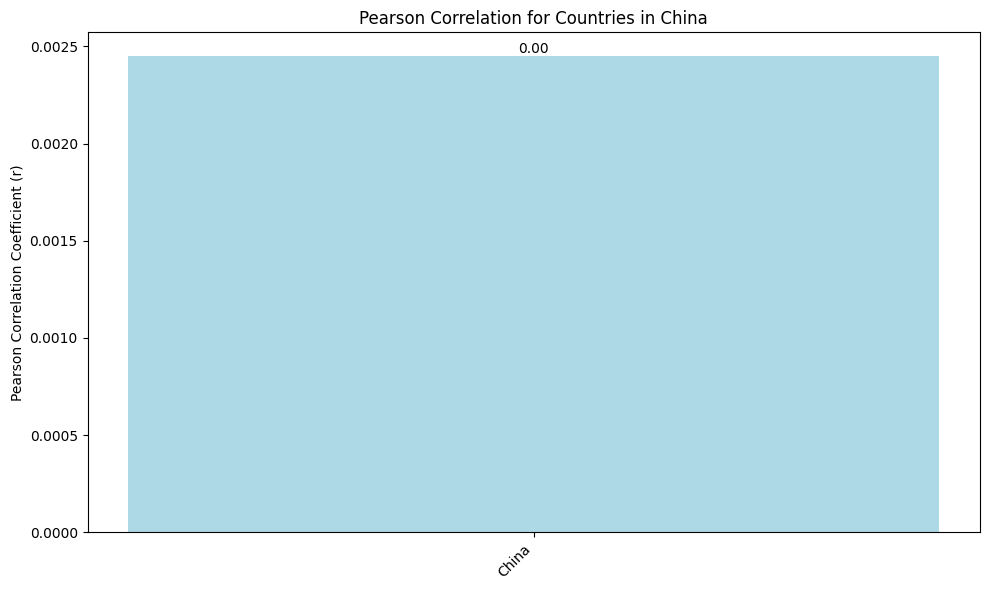

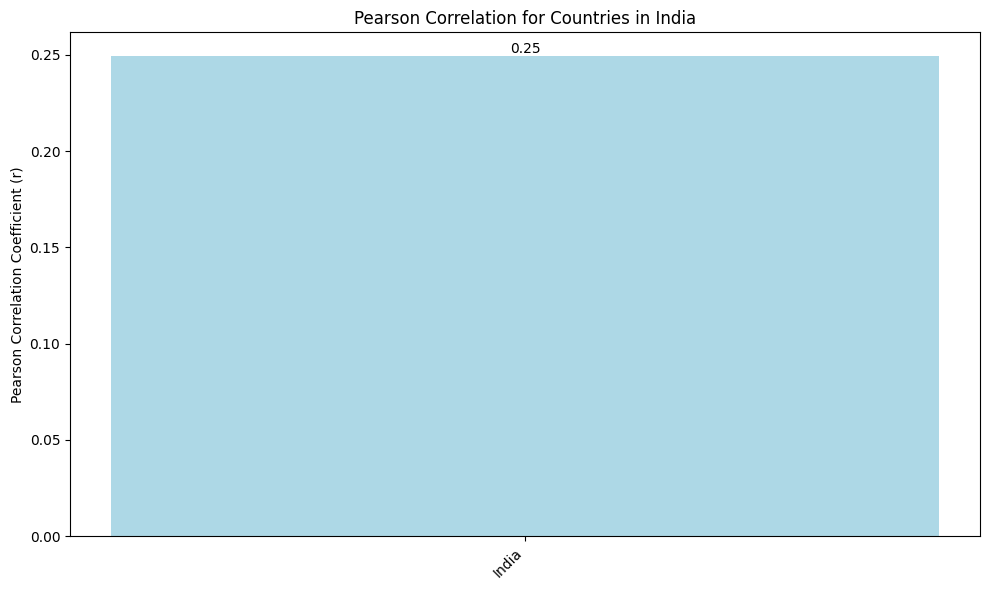

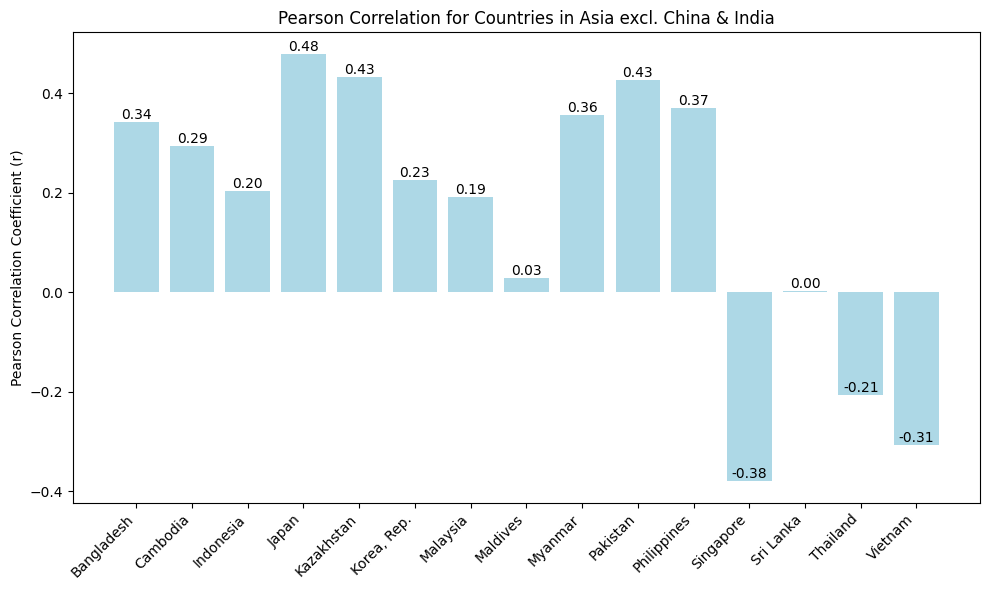

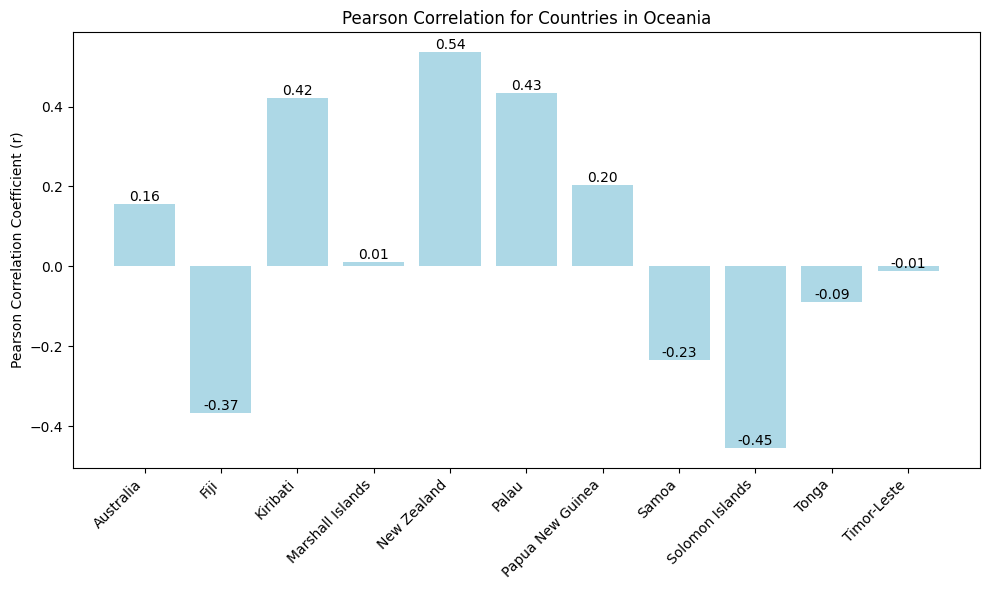

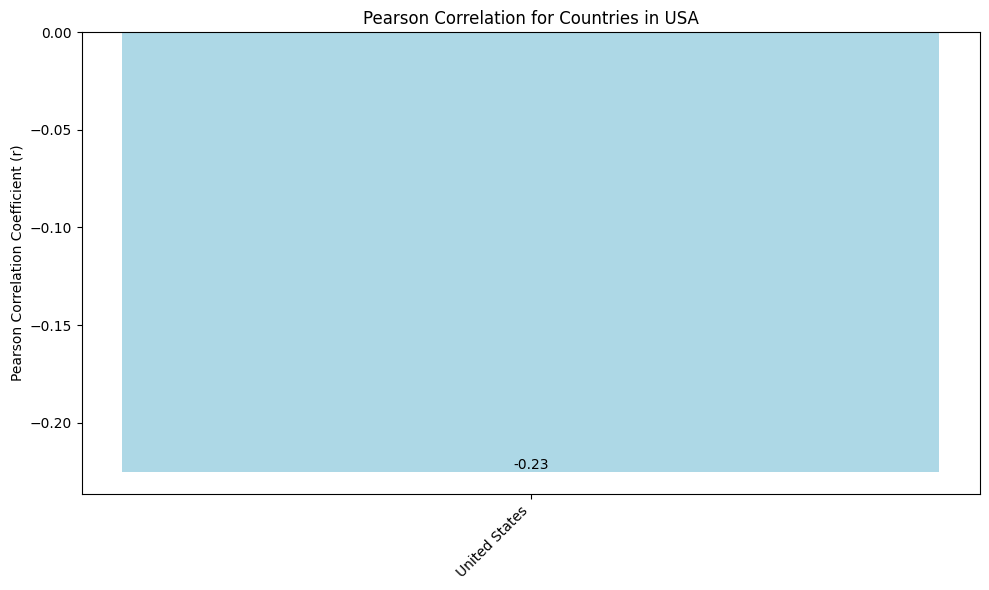

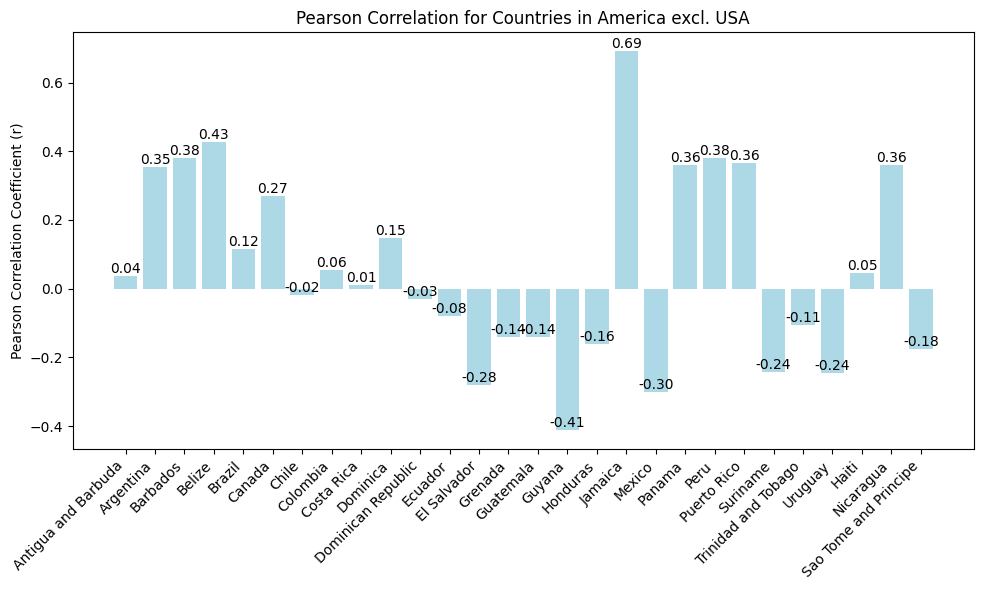

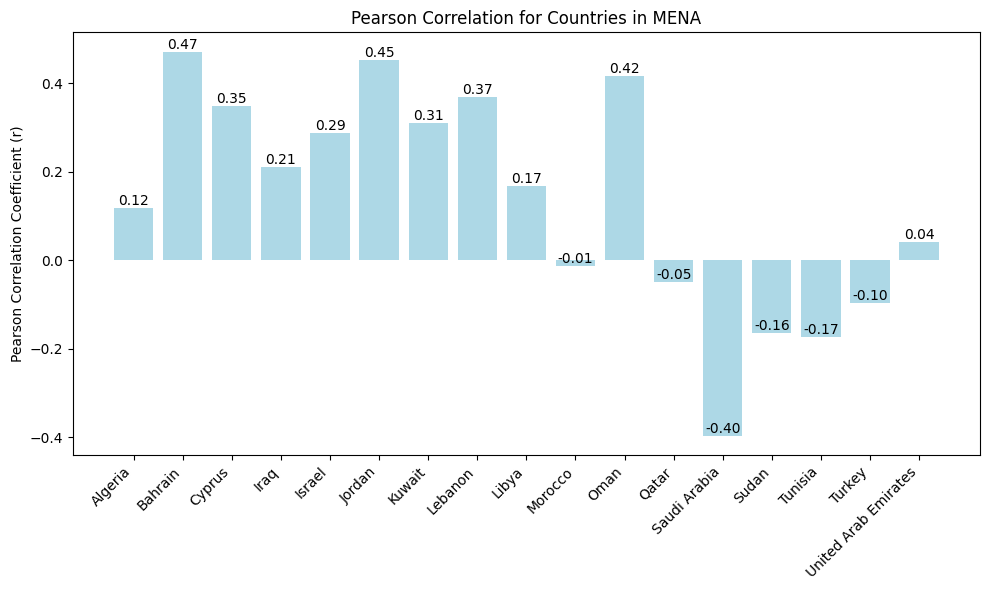

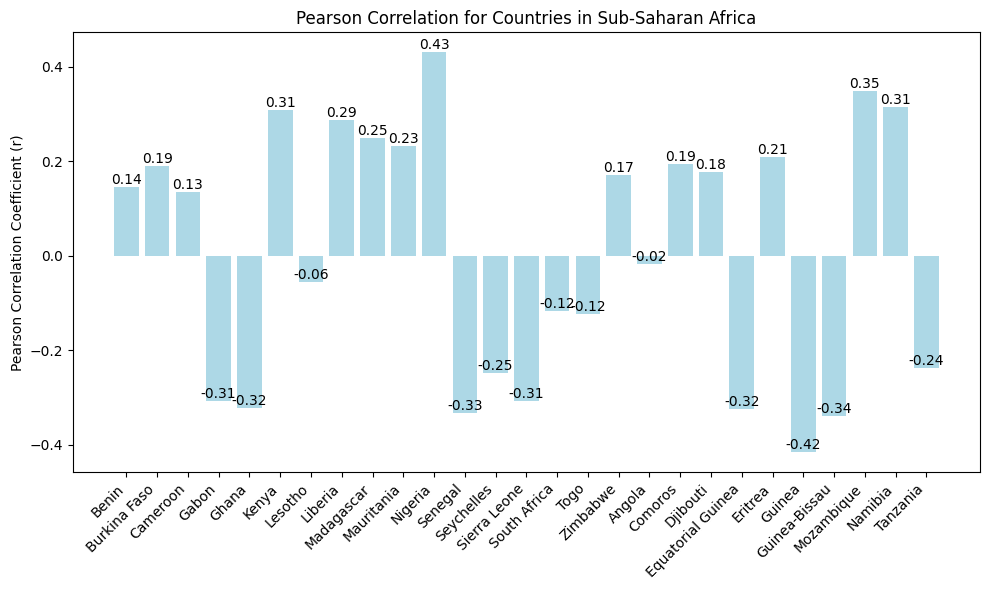

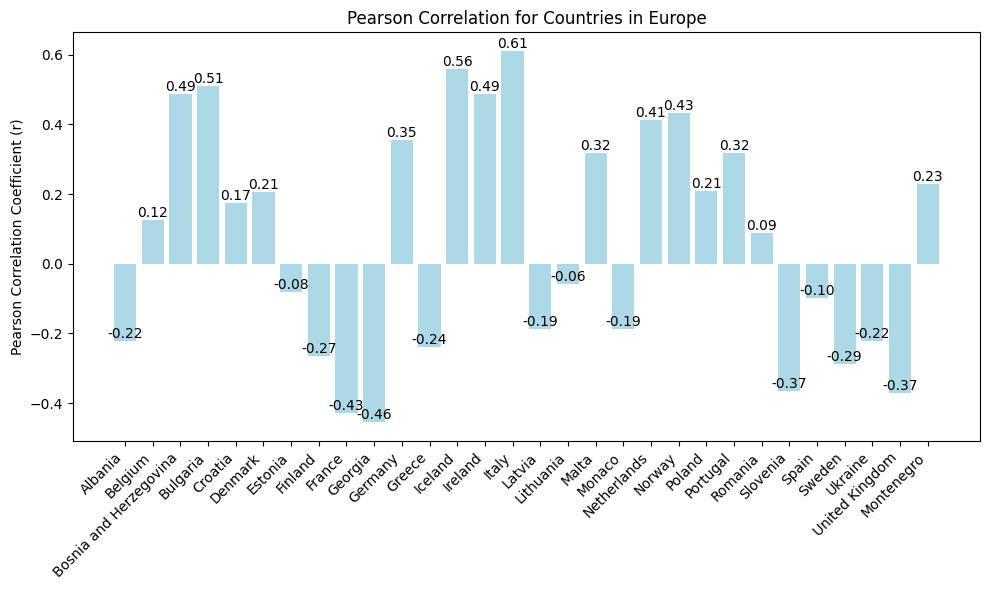

In [21]:
from scipy.stats import pearsonr

def get_country_correlations(merged_df, category_countries):
    # Filter the merged DataFrame to include only the countries in the given category
    category_data = merged_df[merged_df['Country Name'].isin(category_countries)]
    
    country_corr = {}
    
    # Iterate through each country in the category
    for country in category_countries:
        # Filter data for each country
        country_data = category_data[category_data['Country Name'] == country]
        
        if len(country_data) > 1:  # Ensure there is more than one data point for correlation
            # Calculate the Pearson correlation between 'Value' and 'goal_4_score' for the country
            corr, p_value = pearsonr(country_data['Value'], country_data['goal_4_score'])
            country_corr[country] = {'correlation': corr, 'p_value': p_value}
        else:
            # If there is insufficient data for correlation, assign None
            country_corr[country] = {'correlation': None, 'p_value': None}
    
    return country_corr


# Dictionary to store correlation results by country within each category
category_country_corr = {}

# Get correlation for each category (e.g., Asia, MENA, etc.) and their respective countries
category_country_corr['China'] = get_country_correlations(merged_df, china)
category_country_corr['India'] = get_country_correlations(merged_df, india)
category_country_corr['Asia excl. China & India'] = get_country_correlations(merged_df, asia_excl_china_india)
category_country_corr['Oceania'] = get_country_correlations(merged_df, oceania)
category_country_corr['USA'] = get_country_correlations(merged_df, usa)
category_country_corr['America excl. USA'] = get_country_correlations(merged_df, america_excl_usa)
category_country_corr['MENA'] = get_country_correlations(merged_df, mena)
category_country_corr['Sub-Saharan Africa'] = get_country_correlations(merged_df, sub_saharan_africa)
category_country_corr['Europe'] = get_country_correlations(merged_df, europe)

# Display the correlation results for each country in each category
for category, country_corr in category_country_corr.items():
    print(f"--- Correlations for {category} ---")
    for country, stats in country_corr.items():
        correlation = stats['correlation']
        p_value = stats['p_value']
        
        if correlation is not None:
            print(f"{country}: Pearson r = {correlation:.2f}, p-value = {p_value:.4f}")
        else:
            print(f"{country}: Insufficient data")
    print("\n")

# Plot the correlation for each category (same as before, but showing r values)
for category, country_corr in category_country_corr.items():
    countries = [country for country, stats in country_corr.items() if stats['correlation'] is not None]
    correlations = [stats['correlation'] for stats in country_corr.values() if stats['correlation'] is not None]
    
    # Only plot if there are countries with correlation values
    if countries:
        plt.figure(figsize=(10, 6))
        bars = plt.bar(countries, correlations, color='lightblue')
        
        # Annotate each bar with the correlation value
        for bar in bars:
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}', 
                     ha='center', va='bottom', fontsize=10, color='black')
        
        # Add labels and title
        plt.ylabel('Pearson Correlation Coefficient (r)')
        plt.title(f'Pearson Correlation for Countries in {category}')
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Adjust layout to make sure everything fits within the figure
        plt.tight_layout()
        
        # Show the plot
        plt.show()


In [22]:
# pearson r and t test

In [23]:

# Calculate the Pearson correlation between GDP and Education Quality
correlation, p_value = pearsonr(merged_df['Value'], merged_df['goal_4_score'])

print(f"Pearson Correlation: {correlation}")
print(f"P-value: {p_value}")



# Group the countries based on education quality threshold
high_quality_education = merged_df[merged_df['goal_4_score'] > 0.8]
low_quality_education = merged_df[merged_df['goal_4_score'] <= 0.8]

# T-test to compare the means of GDP for high and low education quality
t_stat, p_val = ttest_ind(high_quality_education['Value'], low_quality_education['Value'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_val}")

Pearson Correlation: -0.010043386865923059
P-value: 0.5414367697181267
T-statistic: -0.7412256941655643
P-value: 0.4586036851444616
